# Exploratory Data Analysis (EDA)

The objective of this notebook is to perform a data exploration. In particular, we are interested in understanding what files the dataset contains, their type and how they are structured and related to each other.
Looking at the raw data folder, we can see that it contains 2 folders and several csv files:
- The 2 subfolders are the one containing the images of the dataset.
- The metadata file is the one containing all the relevant information we need to know about the images.
- The remaining csv files contain the information about each pixel in each different image.

For now, we are only interested in the images themselfs and in the metadata file, so let's explore them.

## Metadata Exploration
Let's start by loading the metadata file and see what it contains.

In [24]:
import numpy as np
import pandas as pd

# Load the metadata file and display the first 10 rows
raw_data_path = '../data/raw/HAM10000_metadata.csv'
metadata = pd.read_csv(raw_data_path)
metadata.head(10)

lesion_id      image_id   dx dx_type   age     sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0    male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0    male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0    male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0    male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0    male          ear
5  HAM_0001466  ISIC_0027850  bkl   histo  75.0    male          ear
6  HAM_0002761  ISIC_0029176  bkl   histo  60.0    male         face
7  HAM_0002761  ISIC_0029068  bkl   histo  60.0    male         face
8  HAM_0005132  ISIC_0025837  bkl   histo  70.0  female         back
9  HAM_0005132  ISIC_0025209  bkl   histo  70.0  female         back

As we can see, the file contains standard information relative to each patient, like age and sex, but also information relative to its diagnosis, like the type of diagnosis (dx_type) and its localization.
We also have a image_id which links each row in this file to the corresponding image and a lesion_id, which can be identical for several images, indicating they represent the same lesion, but maybe shown from different perspectives.

In [25]:
# Display basic information about the dataset
metadata.info()
metadata.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


age
count  9958.000000
mean     51.863828
std      16.968614
min       0.000000
25%      40.000000
50%      50.000000
75%      65.000000
max      85.000000

Looking at the above output, we can see that the file contains a total of 10015 rows, but the age columns has only 9958 non-null rows, indicating that it does contain some null values, differently from the other fields. Let's check them.

In [26]:
# Get the unique values in the 'age' column
unique_ages = metadata['age'].unique()
print("Unique ages in the dataset:", unique_ages)

# Display the rows where the age is missing
missing_age = metadata[metadata['age'].isnull()]
print(missing_age)

Unique ages in the dataset: [80. 75. 60. 70. 55. 85. 65. 40. 50. 45. 35.  0. 30. nan  5. 25. 20. 10.
 15.]
        lesion_id      image_id   dx    dx_type  age      sex     localization
968   HAM_0001186  ISIC_0033391  bkl  consensus  NaN  unknown          unknown
969   HAM_0002660  ISIC_0033750  bkl  consensus  NaN  unknown          unknown
970   HAM_0000372  ISIC_0033685  bkl  consensus  NaN  unknown          unknown
971   HAM_0000948  ISIC_0033631  bkl  consensus  NaN  unknown          unknown
972   HAM_0000983  ISIC_0033490  bkl  consensus  NaN  unknown          unknown
973   HAM_0007281  ISIC_0034283  bkl  consensus  NaN  unknown          unknown
974   HAM_0001561  ISIC_0032740  bkl  consensus  NaN  unknown          unknown
975   HAM_0000825  ISIC_0034186  bkl  consensus  NaN  unknown          unknown
977   HAM_0006074  ISIC_0034252  bkl  consensus  NaN  unknown          unknown
978   HAM_0006074  ISIC_0033829  bkl  consensus  NaN  unknown          unknown
1886  HAM_0000169  ISIC_

As we can see, there are indeed NaN values for the feature. Anyway, since our objective is to train an image classifier, the only data that we will need our the images themselfs and the image id and the target variable, which in our case is "dx". This means that we can just ignore the other features.

Instead, let's look more into the details at the target variable.

In [27]:
# Display the unique diagnostic categories in the dataset
diagnostic_categories = metadata['dx'].unique()
print("Diagnostic categories:", diagnostic_categories)

# Display the count of each diagnostic category
diagnostic_counts = metadata['dx'].value_counts()
print("Diagnostic category counts:")
print(diagnostic_counts)

Diagnostic categories: ['bkl' 'nv' 'df' 'mel' 'vasc' 'bcc' 'akiec']
Diagnostic category counts:
dx
nv       6705
mel      1113
bkl      1099
bcc       514
akiec     327
vasc      142
df        115
Name: count, dtype: int64


From the above output we can see that the dataset contains 7 diagnostic categories:

- nv = melanocytic nevi (benign moles)
- mel = melanoma
- bkl = benign keratosis
- bcc = basal cell carcinoma
- akiec = actinic keratoses
- vasc = vascular lesions
- df = dermatofibroma

We can also notice that the dataset is highly imbalanced, since the majority of diagnosis are of type "nv". We will need to keep this in mind later when splitting the dataset.

Finally, let's see how many images there are for each lesion.

In [28]:
# Display the number of images per lesion
max = metadata['lesion_id'].value_counts().max()
min = metadata['lesion_id'].value_counts().min()
average = round(metadata['lesion_id'].value_counts().mean())
print(f"Max number of images per lesion: {max}")
print(f"Min number of images per lesion: {min}")
print(f"Average number of images per lesion: {average}")

Max number of images per lesion: 6
Min number of images per lesion: 1
Average number of images per lesion: 1


Apparently, even though there are several images representing the same lesion, most of the lesions appear in a single image.

## Images Exploration

To start, let's load and display some images from the dataset (five for each diagnosis type).

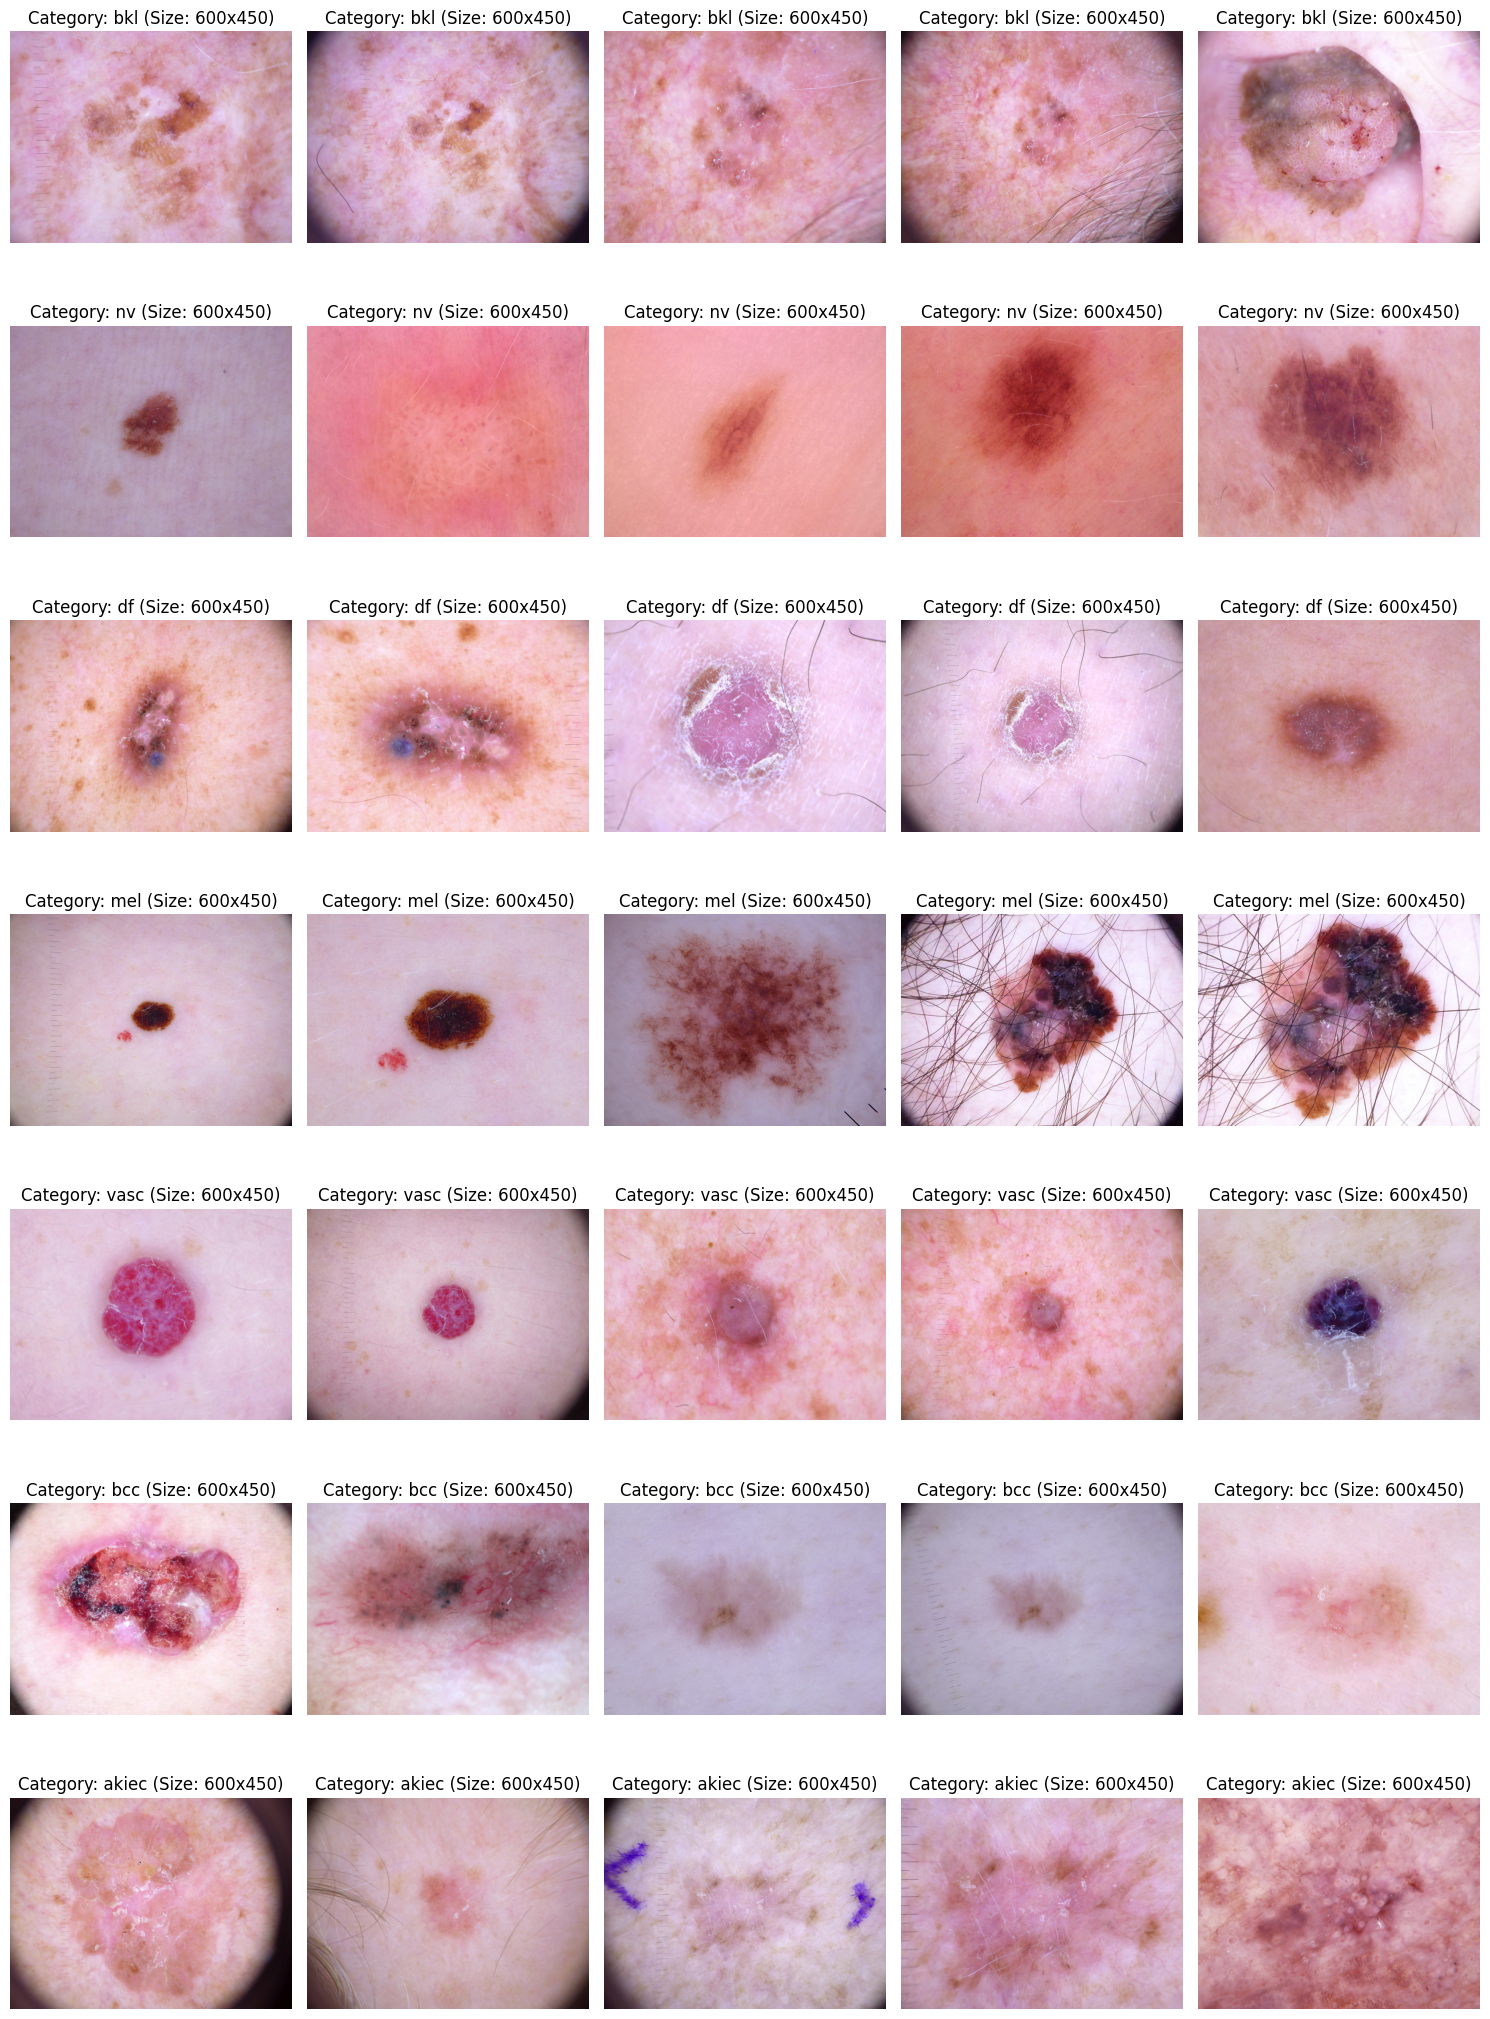

In [29]:
import matplotlib.pyplot as plt
import PIL.Image as Image
from pathlib import Path

n_images = 5

# Get the unique diagnosis types in the dataset
diagnosis_types = metadata['dx'].unique()
n_types = len(diagnosis_types)

# Define images path
images_dir = Path('../data/raw/')

# Create a figure with subplots for each diagnosis type
fig, axes = plt.subplots(n_types, n_images, figsize=(15, 3 * n_types))
for row, dx in enumerate(diagnosis_types):
    
    image_ids = metadata[metadata['dx'] == dx]['image_id'].head(n_images).values
    filenames = [f"{image_id}.jpg" for image_id in image_ids]
    for col in range(n_images):
        ax = axes[row, col]
        image_id = image_ids[col]
        filename = f"{image_id}.jpg"
        
        # Search for the image
        matches = list(images_dir.glob(f"**/{filename}"))
        
        if matches:
            image = Image.open(matches[0])
            width, height = image.size
            ax.imshow(image)
            ax.set_title(f"Category: {dx} (Size: {width}x{height})")
        else:
            ax.text(0.5, 0.5, 'Not Found', ha='center')
        ax.axis('off')
plt.tight_layout()
plt.show()

As we can see, while in general we can separate images belonging to different categories, the distinction is not always so obvious, since there are some cases in which images of different classes appear related. This information will help us when evaluating the performance of the model we will train on these images.

Also, we can notice that in some cases, there are hairs on top of a lesion, making it less visible. We will try to handle them in the preprocessing step.

Now let's check the size of the images to understand if they are identycal for the whole dataset or if there are images with different dimensions.

In [30]:
# Initialize empty lists to store image dimensions
widths = []
heights = []

# Define images path
images_dir = Path('../data/raw/')

# Iterate through each image in the dataset
for image_id in metadata['image_id']:
    filename = f"{image_id}.jpg"
    
    # Search for the image
    matches = list(images_dir.glob(f"**/{filename}"))
    
    if matches:
        image = Image.open(matches[0])
        width, height = image.size
        widths.append(width)
        heights.append(height)
    
# Create a DataFrame to store the dimensions
dimensions_df = pd.DataFrame({'width': widths, 'height': heights})

# Show unique entries
print("Unique widths:", dimensions_df['width'].unique())
print("Unique heights:", dimensions_df['height'].unique())

KeyboardInterrupt: 

Apparently, all the images in the dataset have the same size. However, later we will resize them to lower dimensions, in order to optimize the training process and, at the same time, ensure we do not loose too much details.

Now let's check if all the images have a correspondence in the metadata file, or if there are missing ones.

In [ ]:
# Check for missing images
for image_id in metadata['image_id']:
    filename = f"{image_id}.jpg"
    matches = list(images_dir.glob(f"**/{filename}"))
    if not matches:
        print(f"Image not found: {filename}")

Fortunately, all the images are referenced in the metadata file.

At this point, we can take a look at the pixel values of the images to understand if they are already normalized or we will need to do it in the preprocessing step.

In [31]:
# Extract pixel value ranges for a sample of images
for image_id in metadata['image_id'].sample(10):
    filename = f"{image_id}.jpg"
    matches = list(images_dir.glob(f"**/{filename}"))
    
    if matches:
        img = Image.open(matches[0])
        img_array = np.array(img)
        print(f"Image ID: {image_id} - Min: {img_array.min()}, Max: {img_array.max()}")

Image ID: ISIC_0025525 - Min: 7, Max: 236
Image ID: ISIC_0031179 - Min: 28, Max: 247
Image ID: ISIC_0033286 - Min: 1, Max: 255
Image ID: ISIC_0025155 - Min: 0, Max: 241
Image ID: ISIC_0027660 - Min: 31, Max: 253
Image ID: ISIC_0030723 - Min: 4, Max: 226
Image ID: ISIC_0033454 - Min: 16, Max: 255
Image ID: ISIC_0027766 - Min: 0, Max: 225
Image ID: ISIC_0025272 - Min: 44, Max: 253
Image ID: ISIC_0026224 - Min: 61, Max: 254


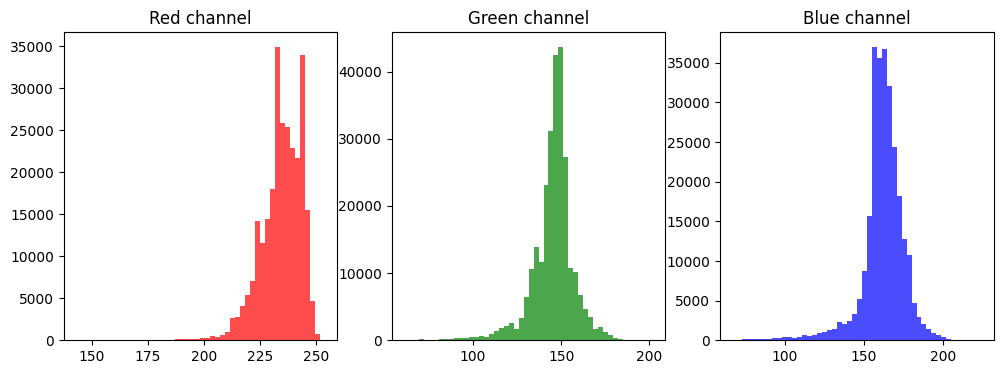

In [32]:
# Plot histograms of pixel values for a sample image
r = img_array[:, :, 0].flatten()
g = img_array[:, :, 1].flatten()
b = img_array[:, :, 2].flatten()

plt.figure(figsize=(12, 4))
plt.subplot(1, 3, 1)
plt.hist(r, bins=50, color='red', alpha=0.7)
plt.title('Red channel')

plt.subplot(1, 3, 2)
plt.hist(g, bins=50, color='green', alpha=0.7)
plt.title('Green channel')

plt.subplot(1, 3, 3)
plt.hist(b, bins=50, color='blue', alpha=0.7)
plt.title('Blue channel')

plt.show()

As we can see, the range for the pixel values is [0,255]. This means that later, before fine-tuning the choosen model, we will need to normalize the images to the same range of values of the images the model was original trained on.